In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Github/DL-project/

/content/drive/MyDrive/Github/DL-project


In [4]:
import re
import sys
import unittest
import importlib
from pathlib import Path
import matplotlib.pyplot as plt

from model_hyper_tuning import *

import torch
import torch.nn.functional as F

# Import tqdm if installed
try:
    from tqdm import tqdm
except ImportError:
    tqdm = lambda x: x

In [5]:
verbose=True

def compute_psnr(x, y, max_range=1.0):
        assert x.shape == y.shape and x.ndim == 4
        return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y) ** 2).mean((1,2,3))).mean()


## Training

[PSNR before: 20.72 dB]
Epoch #0: Training loss = 0.00020285650403238832 ----- Validation loss = 0.00015744570484384893 
Epoch #1: Training loss = 0.00015630580515135079 ----- Validation loss = 0.00015415909755975009 
Epoch #2: Training loss = 0.0001539376394590363 ----- Validation loss = 0.00015217260736972093 
Epoch #3: Training loss = 0.00015263290000148118 ----- Validation loss = 0.00015216999324038625 
Epoch #4: Training loss = 0.00015184309233445673 ----- Validation loss = 0.00015091088404878974 
Epoch #5: Training loss = 0.0001512139513157308 ----- Validation loss = 0.00015017357347533108 
Epoch #6: Training loss = 0.00015081020744983108 ----- Validation loss = 0.00015047484170645475 
Epoch #7: Training loss = 0.00015036183479242025 ----- Validation loss = 0.00014938548542559147 
Epoch #8: Training loss = 0.00015007144820410758 ----- Validation loss = 0.00014964095233008264 
Epoch #9: Training loss = 0.000149829838052392 ----- Validation loss = 0.00014981244495138526 


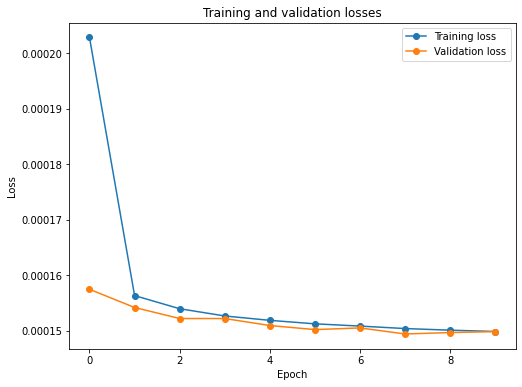

In [6]:
model = Model()
train_path="./data/train_data.pkl"
val_path = "./data/val_data.pkl"
save_path = "./data/8_may_20e.pth"
train_input0, train_input1 = torch.load(train_path)
val_input, val_target = torch.load(val_path)

train_input0 = train_input0.float() / 255.0
train_input1 = train_input1.float() / 255.0
val_input = val_input.float() / 255.0
val_target = val_target.float() / 255.0

output_psnr_before = compute_psnr(val_input, val_target)
print(f"[PSNR before: {output_psnr_before:.2f} dB]")

train_loss = model.train(train_input0, train_input1, nb_epochs= 10, verbose=verbose, SAVE_PATH=save_path)


In [ ]:
print(train_loss)

None


## Loading pretrained model

In [ ]:
model = Model()

In [ ]:
model.load_pretrained_model(SAVE_PATH='./data/save.pth')

val_path = "./data/val_data.pkl"
val_input, val_target = torch.load(val_path)
val_input = val_input.float() / 255.0
val_target = val_target.float() / 255.0

else


## Predicting

In [ ]:
mini_batch_size = 100
#Checker ici ce qu'il se passe avec model.predict()
model_outputs = model.predict(val_input)

In [ ]:
output_psnr_after = compute_psnr(model_outputs, val_target)

print(f"[PSNR: {output_psnr_after:.2f} dB]")

[PSNR: 25.05 dB]


In [ ]:
model_outputs.shape

torch.Size([1000, 3, 32, 32])

## Plot

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


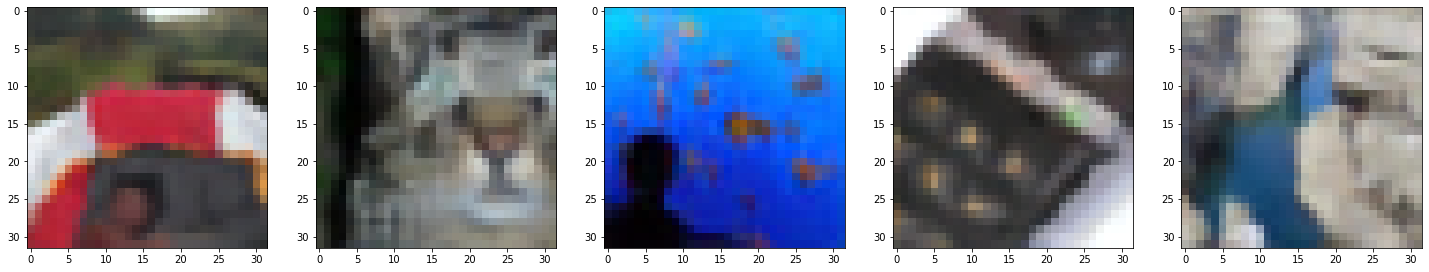

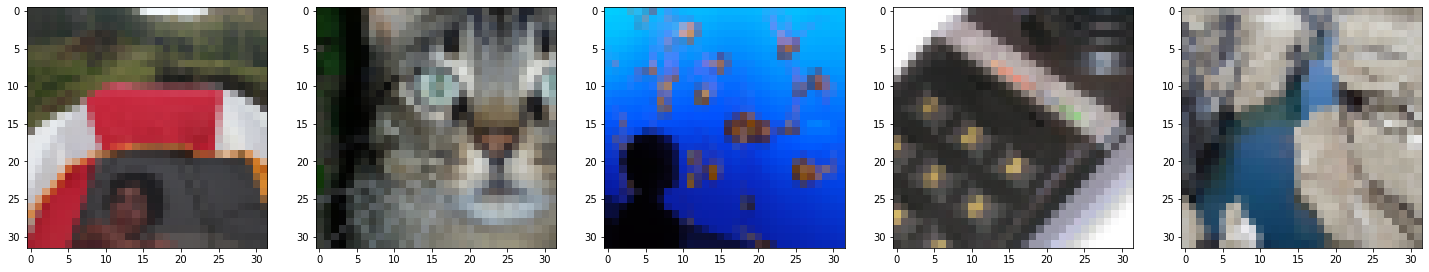

In [ ]:
N = 5
plt.figure(figsize=(N*5,2*5))
for i, item in enumerate(model_outputs[:][20:][:][:]):
    if i >= N: break
    plt.subplot(2, N, i+1)
    item = item.permute((1,2,0))
    plt.imshow(item.detach().numpy())
plt.figure(figsize=(N*5,2*5))
for i, item in enumerate(val_target[:][20:][:][:]):
    if i >= N: break
    plt.subplot(2, N, i+1)
    item = item.permute((1,2,0))
    plt.imshow(item.detach().numpy())

## Git

In [ ]:
!git add .

In [ ]:
!git commit -m "weight save and load added"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@0e81871e8aa7.(none)')


In [ ]:
  !git config --global user.email "louis.drame21@gmail.com"
  !git config --global user.name "ldrameColab"

In [ ]:
!git add .

In [ ]:
!git commit -m "weight save and load added"

[main fd9d56d] weight save and load added
 5 files changed, 11 insertions(+), 66 deletions(-)
 create mode 100644 __pycache__/model.cpython-37.pyc
 create mode 100644 __pycache__/taro.cpython-37.pyc
 create mode 100644 data/save.pth
 rewrite test.ipynb (100%)


In [ ]:
!git push

Counting objects: 9, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (9/9), 166.05 KiB | 9.77 MiB/s, done.
Total 9 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/ldrame21/DL-project
   bd19f42..fd9d56d  main -> main
